In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [4]:
data = pd.read_excel('/home/tonde/Bureau/l2/MES_CODES/PYTHON_SCRIPTS/IA/predic_house/train/data.xlsx')
data.head()


,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,loyer_mensuel_1_decile,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_observations,nombre_logements,methodologie_production
0,B1300,2022,Agglomération d'Aix-Marseille,NaN,NaN,NaN,NaN,NaN,9.3,10.7,...,450.0,540.0,670.0,837.0,1100.0,770.0,60.0,25214.0,222225.0,Estimation directe
1,B1300,2022,Agglomération d'Aix-Marseille,NaN,NaN,NaN,NaN,Maison 1-3P,9.7,10.9,...,600.0,673.0,798.0,950.0,1200.0,828.0,63.0,445.0,14886.0,Estimation directe
2,B1300,2022,Agglomération d'Aix-Marseille,NaN,NaN,NaN,NaN,Ensemble 4P+,7.9,9.5,...,650.0,790.0,1000.0,1250.0,1550.0,1136.0,97.0,3288.0,46880.0,Estimation directe
3,B1300,2022,Agglomération d'Aix-Marseille,NaN,NaN,NaN,NaN,Maison 4P+,7.5,10.0,...,850.0,1000.0,1205.0,1490.0,1700.0,1305.0,112.0,655.0,16549.0,Estimation directe
4,B1300,2022,Agglomération d'Aix-Marseille,NaN,NaN,NaN,NaN,Appart 1P,12.2,14.3,...,350.0,400.0,455.0,515.0,565.0,458.0,28.0,4144.0,30467.0,Estimation directe


In [5]:
data.describe()

,Data_year,loyer_1_decile,loyer_1_quartile,loyer_median,loyer_3_quartile,loyer_9_decile,loyer_moyen,loyer_mensuel_1_decile,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_observations,nombre_logements
count,4884.0,3484.000000,3768.000000,3768.000000,3768.000000,3484.000000,3768.000000,3484.000000,3768.000000,3768.000000,3768.000000,3484.000000,3768.000000,3768.000000,4747.000000,2230.000000
mean,2022.0,8.592279,10.452548,12.005653,13.774867,14.697388,11.897081,483.510046,579.768577,676.710987,797.941879,886.764064,710.656316,62.847399,830.452075,5363.959641
std,0.0,1.889576,3.088504,3.592218,4.240008,3.630066,3.629433,131.506131,193.118554,243.022912,319.982244,366.865172,272.646453,22.889279,1985.123295,13919.658548
min,2022.0,2.400000,5.400000,5.900000,6.600000,7.300000,6.000000,100.000000,275.000000,295.000000,324.000000,350.000000,300.000000,20.000000,1.000000,4.000000
25%,2022.0,7.200000,8.500000,9.800000,11.100000,12.300000,9.500000,385.000000,450.000000,520.000000,605.000000,660.000000,540.000000,45.000000,66.000000,428.000000
50%,2022.0,8.400000,9.800000,11.200000,12.900000,14.200000,11.100000,460.000000,545.500000,630.000000,730.000000,840.000000,654.000000,62.000000,223.000000,1515.500000
75%,2022.0,9.800000,11.500000,13.200000,15.200000,16.700000,13.100000,562.250000,673.250000,780.000000,910.000000,1043.000000,826.000000,80.000000,733.000000,4525.250000
max,2022.0,17.500000,27.200000,30.600000,33.700000,83.300000,29.800000,1100.000000,2087.000000,2519.000000,3247.000000,9999.000000,2718.000000,140.000000,33073.000000,222225.000000


In [6]:
#Utiliser les valeurs de moyenne_loyer_mensuel	surface_moyenne	nombre_observations	nombre_logements
data = data[['Data_year', 'moyenne_loyer_mensuel', 'surface_moyenne', 'nombre_observations']]
data.head()


,Data_year,moyenne_loyer_mensuel,surface_moyenne,nombre_logements
0,2022,770.0,60.0,222225.0
1,2022,828.0,63.0,14886.0
2,2022,1136.0,97.0,46880.0
3,2022,1305.0,112.0,16549.0
4,2022,458.0,28.0,30467.0


In [7]:
data.dropna(inplace=True) 


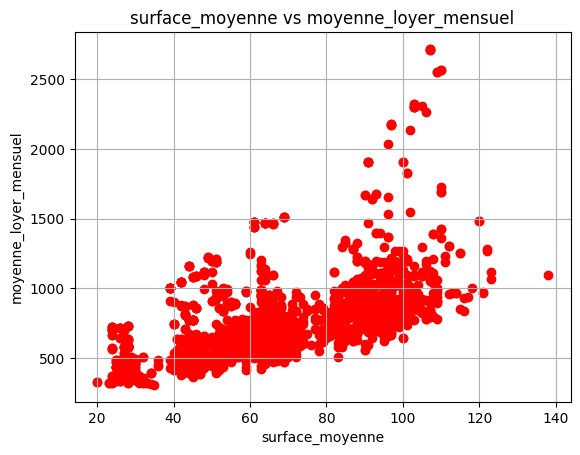

In [8]:
df = pd.DataFrame(data)


#scatter plot
plt.scatter(df['surface_moyenne'], df['moyenne_loyer_mensuel'], color='red')
plt.title('surface_moyenne vs moyenne_loyer_mensuel')
plt.xlabel('surface_moyenne')
plt.ylabel('moyenne_loyer_mensuel')
plt.grid(True)
plt.show()


In [9]:
X = data.drop('moyenne_loyer_mensuel', axis=1)
Y = data["moyenne_loyer_mensuel"]
print(Y)

X_train,x_test, Y_train, y_test = train_test_split(X, Y)

0        770.0
1        828.0
2       1136.0
3       1305.0
4        458.0
         ...  
4876     551.0
4877     730.0
4879     704.0
4881     605.0
4882     775.0
Name: moyenne_loyer_mensuel, Length: 2120, dtype: float64


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
predictions = model.predict(x_test)
predictions

In [ ]:
test = [[2022, 60, 25214]]
res = model.predict(test)
print(res)

# Save the model for later use in Flask
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)